## Reading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly

In [3]:
def clean(df):
    df = df[df['State'] == 'finished']

    patterns = ['l0$', 'frac_recovered$', 'l2_loss$', 'loss_original$', 'loss_reconstructed']
    filtered_columns = df.columns[df.columns.str.contains('|'.join(patterns))]

    df = df[filtered_columns]

    df.columns = [col.split('/')[-1] for col in df.columns]
    
    l0 = df["l0"].to_numpy().flatten()
    l2_loss = df["l2_loss"].to_numpy().flatten()
    frac_recovered = df["frac_recovered"].to_numpy().flatten()
    loss_original = df["loss_original"].to_numpy().flatten()
    loss_reconstructed = df["loss_reconstructed"].to_numpy().flatten()
    delta_ce = loss_reconstructed - loss_original

    data = np.array([l0, l2_loss, frac_recovered, delta_ce]).T
    df = pd.DataFrame(data, columns=['l0', 'l2_loss', 'frac_recovered', 'delta_ce'])
    df = df.sort_values(by='l0')
    return df

In [4]:
def clean_topk(df):
    df = df[df['State'] == 'finished']

    patterns = ['effective_l0$', 'frac_recovered$', 'l2_loss$', 'loss_original$', 'loss_reconstructed']
    filtered_columns = df.columns[df.columns.str.contains('|'.join(patterns))]

    df = df[filtered_columns]

    df.columns = [col.split('/')[-1] for col in df.columns]
    
    l0 = df["effective_l0"].to_numpy().flatten()
    l2_loss = df["l2_loss"].to_numpy().flatten()
    frac_recovered = df["frac_recovered"].to_numpy().flatten()
    loss_original = df["loss_original"].to_numpy().flatten()
    loss_reconstructed = df["loss_reconstructed"].to_numpy().flatten()
    delta_ce = loss_reconstructed - loss_original

    data = np.array([l0, l2_loss, frac_recovered, delta_ce]).T
    df = pd.DataFrame(data, columns=['l0', 'l2_loss', 'frac_recovered', 'delta_ce'])
    df = df.sort_values(by='l0')
    return df

In [5]:
df_relu = pd.read_csv("primary-relu.csv")
df_relu = clean(df_relu)

df_gated = pd.read_csv("primary-gated.csv")
df_gated = clean(df_gated)

df_topk = pd.read_csv("primary-topk.csv")
df_topk = clean_topk(df_topk)

## Plotting

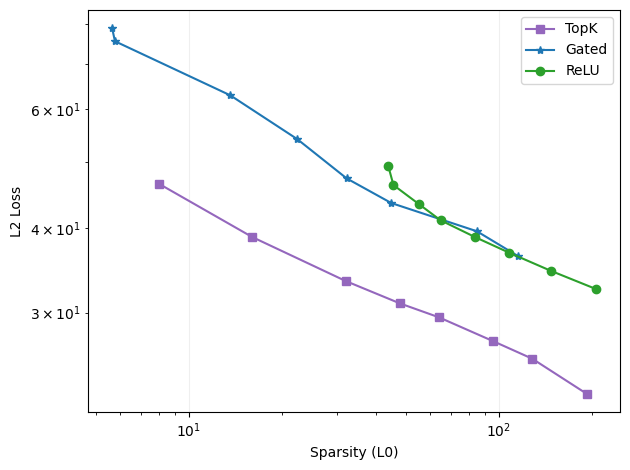

In [6]:
plt.plot(df_topk['l0'], df_topk['l2_loss'], label='TopK', marker='s', color='#9467bd')
plt.plot(df_gated['l0'], df_gated['l2_loss'], label='Gated', marker='*', color='#1f77b4')
plt.plot(df_relu['l0'], df_relu['l2_loss'], label='ReLU', marker='o', color='#2ca02c')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Sparsity (L0)")
plt.ylabel("L2 Loss")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("l0_l2loss.png")
plt.show()

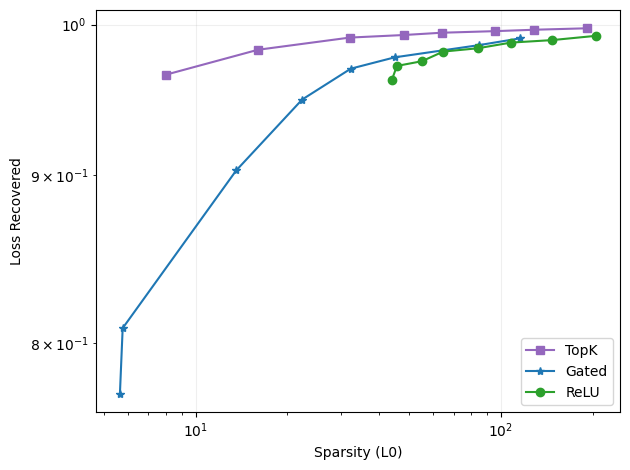

In [7]:
plt.plot(df_topk['l0'], df_topk['frac_recovered'], label='TopK', marker='s', color='#9467bd')
plt.plot(df_gated['l0'], df_gated['frac_recovered'], label='Gated', marker='*', color='#1f77b4')
plt.plot(df_relu['l0'], df_relu['frac_recovered'], label='ReLU', marker='o', color='#2ca02c')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Sparsity (L0)")
plt.ylabel("Loss Recovered")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("l0_lossrec.png")
plt.show()

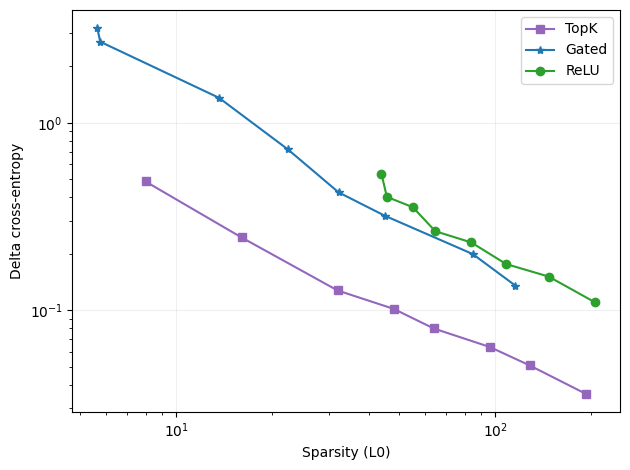

In [8]:
plt.plot(df_topk['l0'], df_topk['delta_ce'], label='TopK', marker='s', color='#9467bd')
plt.plot(df_gated['l0'], df_gated['delta_ce'], label='Gated', marker='*', color='#1f77b4')
plt.plot(df_relu['l0'], df_relu['delta_ce'], label='ReLU', marker='o', color='#2ca02c')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Sparsity (L0)")
plt.ylabel("Delta cross-entropy")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("l0_deltace.png")
plt.show()